In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


data = pd.read_csv("BreastCancerData.csv")

# Drop unnecessary columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Encode the diagnosis column (Malignant = 1, Benign = 0)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.956140350877193


In [4]:
print("Please enter the values for each feature:")
user_input = {}
for col in X.columns:
    user_input[col] = float(input(f"{col}: "))

# Predict using the trained model
new_instance = []
for col in X.columns:
    new_instance.append(user_input[col])
predicted_class = knn.predict([new_instance])

# Map the predicted class to original labels
predicted_class_label = label_encoder.inverse_transform(predicted_class)
result = "Malignant" if predicted_class_label[0] == 'M' else "Benign"
print("Predicted Class:", result)

Please enter the values for each feature:


KeyboardInterrupt: Interrupted by user

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


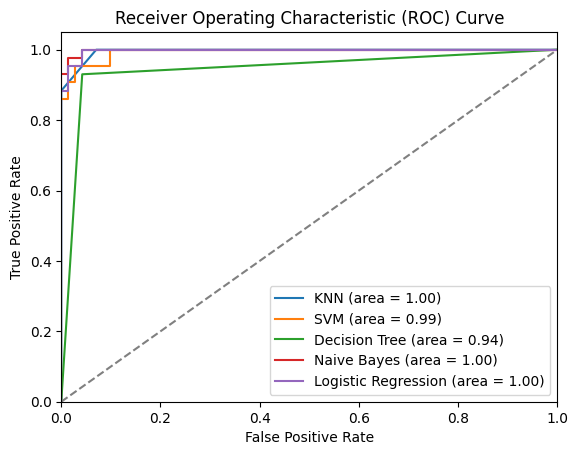

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc

# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

# Train and print classification reports for each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    if name == "KNN":
        y_scores = classifier.predict_proba(X_test)[:, 1]
    else:
        if hasattr(classifier, "predict_proba"):
            y_scores = classifier.predict_proba(X_test)[:, 1]
        else:
            # For classifiers that do not support predict_proba (e.g., Decision Tree)
            # we'll use predict and manually calculate probabilities
            leaf_nodes = classifier.apply(X_test)
            # Get the class frequencies for each leaf node
            leaf_node_counts = pd.DataFrame(classifier.tree_.value[leaf_nodes][:, 0, :],
                                            columns=classifier.classes_)
            # Normalize counts to get probabilities
            y_scores = leaf_node_counts.div(leaf_node_counts.sum(axis=1), axis=0).iloc[:, 1].values
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = %0.2f)' % roc_auc)


# Plot ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
